In [ ]:
!pip install catboost

In [46]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import catboost

import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('train.csv', index_col=0)

In [21]:
df

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...
117559,132.843750,56.748838,-0.060070,-0.554084,4.054348,27.844144,6.564423,44.442664,0
117560,112.578125,52.539271,0.179580,-0.306961,1.637960,15.331913,11.384718,142.535470,0
117561,119.757812,49.980013,0.064402,-0.270822,3.877926,19.788559,6.959740,56.367789,0


In [40]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):
    plt.figure(figsize=(4 * 3, 4 * 2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 3, i + 1)
        plt.grid()
        plt.hist(X1[:, i], bins=bins, alpha=0.3, label=label1, color="C4")
        plt.hist(X2[:, i], bins=bins, alpha=0.5, label=label2, color="C0")
        plt.xlabel(names[i], size=14)
        plt.legend(loc="best")
    plt.tight_layout()

In [41]:
X = df.drop(columns=['Class']).values

y = df.Class.values
names = df.columns

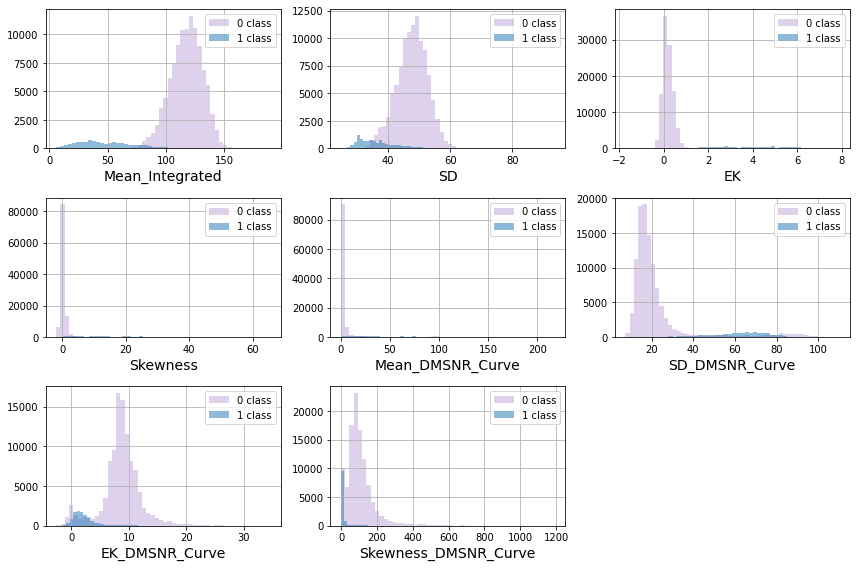

In [42]:
plot_hists(X[y == 0],
           X[y == 1],
           names,
           label1="0 class",
           label2="1 class",
           bins=50)

In [89]:
boost = catboost.CatBoostClassifier(learning_rate=0.02)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)
boost.fit(X_train,
          y_train,
          eval_set=(X_val, y_val))

In [110]:
from sklearn.metrics import log_loss

val_preds = boost.predict_proba(X_val)[:, 1]
log_loss(y_val, val_preds)

0.03041634269987944

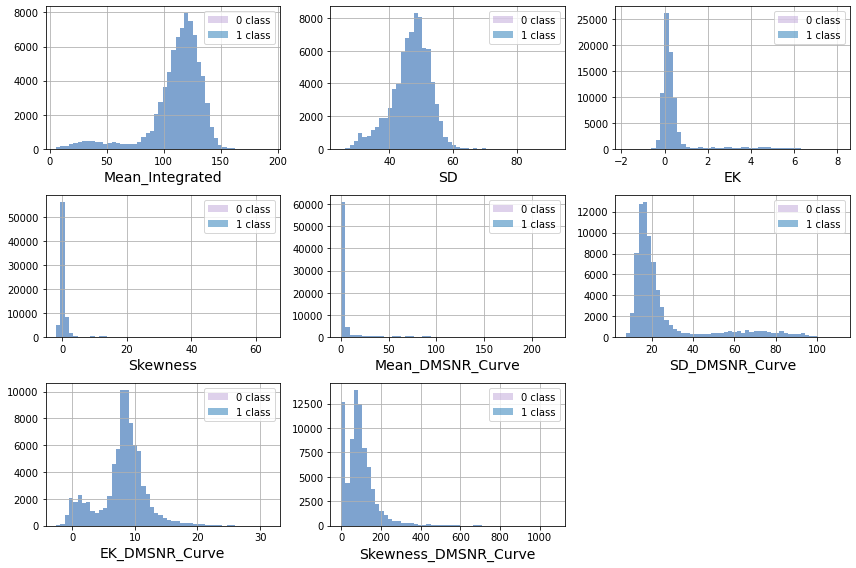

In [96]:
test_df = pd.read_csv('test.csv', index_col=0)

test_X = test_df.values

names = df.columns

plot_hists(test_X,
           test_X,
           names,
           label1="0 class",
           label2="1 class",
           bins=50)

In [107]:
preds = boost.predict_proba(test_df.values)[:,1]

In [108]:
pd.read_csv('sample_submission.csv').head(3)

,id,Class
0,117564,0.5
1,117565,0.5
2,117566,0.5


In [109]:
submission = pd.DataFrame(test_df.index)
submission['Class'] = preds
submission.to_csv('submission.csv', index=False)